In [46]:
import matplotlib.pyplot as plt
from pymks import generate_multiphase, plot_microstructures
from pymks import paircorr_from_twopoint, TwoPointCorrelation, PrimitiveTransformer

# Random Microstructures

*replace with real microstructures at some point*

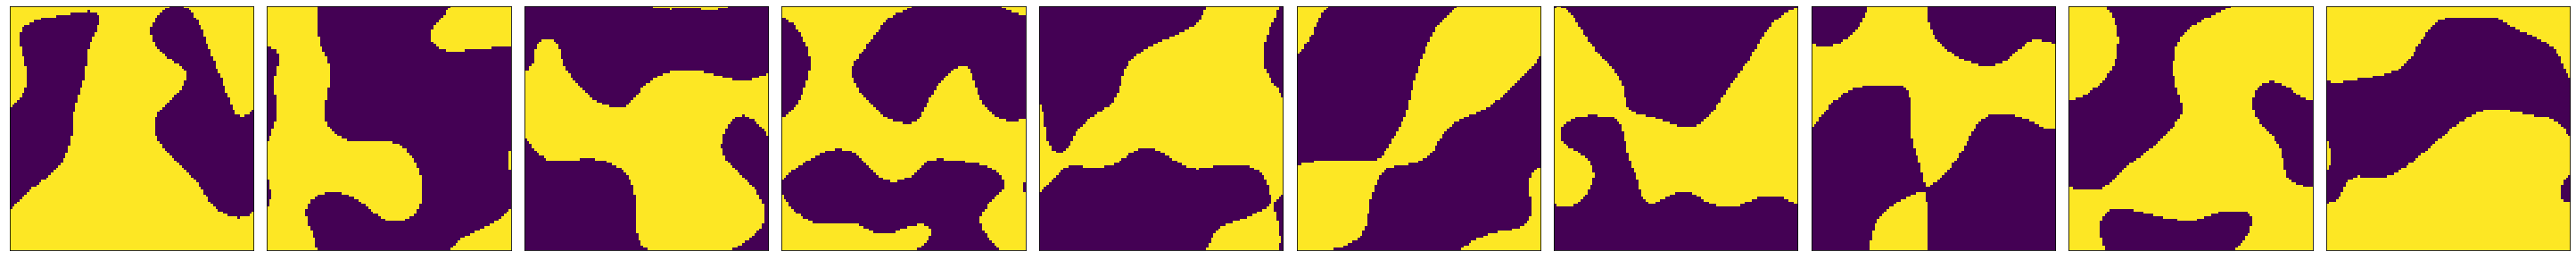

In [41]:
microstructures = generate_multiphase(shape=(10,101,101), grain_size=(70,70), volume_fraction=(0.5, 0.5), chunks=200, percent_variance=0.15)
plot_microstructures(*microstructures, colorbar=False)

# Generate Two Point Stats

(10, 101, 101)


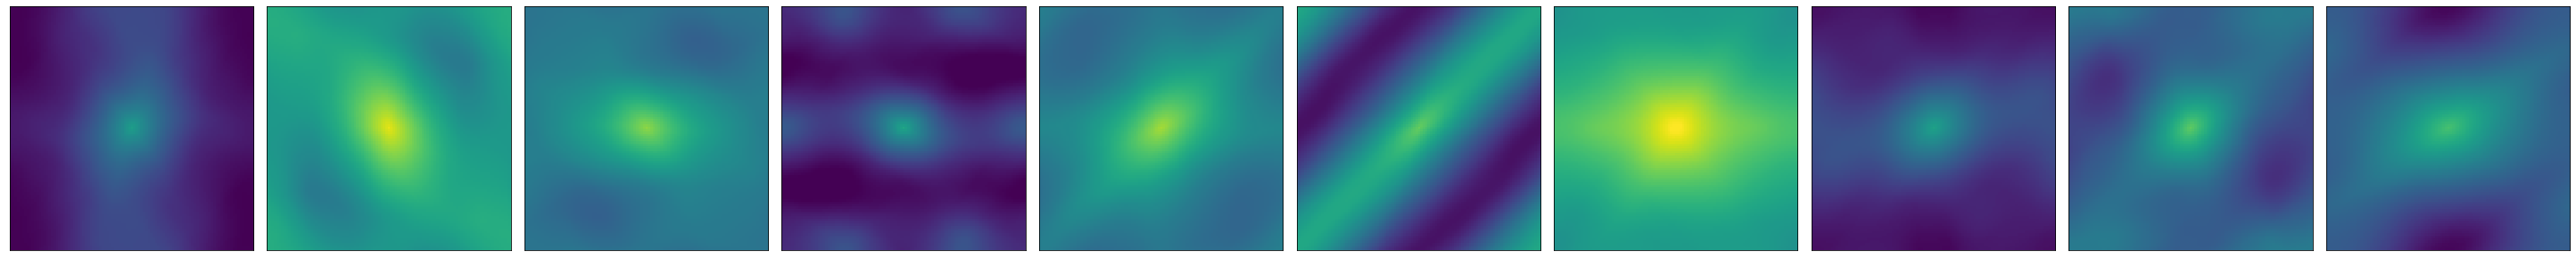

In [55]:
discretized = PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(microstructures)

twopointstats = TwoPointCorrelation(
    periodic_boundary=True,
    correlations=[[1,1]]
).transform(discretized)

twopointstats = twopointstats.squeeze(-1)

plot_microstructures(*twopointstats, colorbar=False)

# Generate Pair Correlation Plots

In [61]:
probs, radii = paircorr_from_twopoint(twopointstats, interpolate_n=500)
probs = probs.compute()

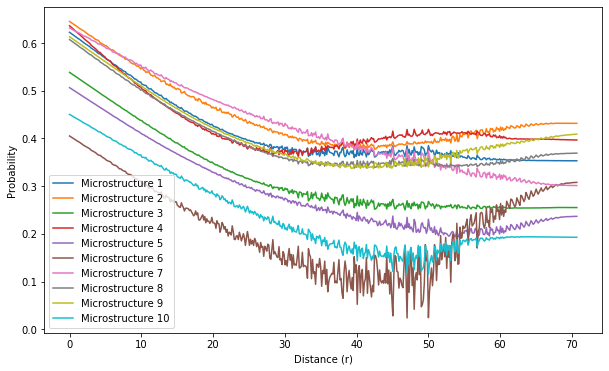

In [65]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(probs.shape[0]):
    ax.plot(radii, probs[i,:], label="Microstructure %d"%(i+1))

ax.set_ylabel("Probability")
ax.set_xlabel("Distance (r)")
ax.legend()
plt.show(fig)